In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the Train set
train_set = pd.read_csv("C:/Users/admin/Desktop/neha project/titanic/train.csv")
test_set=pd.read_csv("C:/Users/admin/Desktop/neha project/titanic/test.csv")
train_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [3]:
# inspect the structure etc.
print(train_set.info(), "\n")
print(train_set.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

(891, 12)


In [4]:
train_set['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

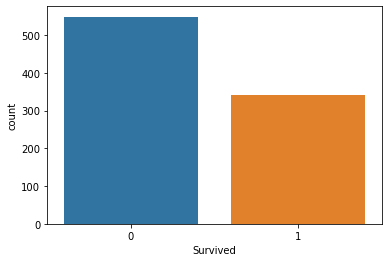

Percent of fraud transaction:  38.38383838383838 %
Percent of normal transaction:  61.61616161616161 %


In [5]:
sns.countplot(train_set['Survived'])
plt.show()
print('Percent of fraud transaction: ',len(train_set[train_set['Survived']==1])/len(train_set['Survived'])*100,"%")
print('Percent of normal transaction: ',len(train_set[train_set['Survived']==0])/len(train_set['Survived'])*100,"%")

In [6]:
# missing values in Train set df
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
round(100*(test_set.isnull().sum().sort_values(ascending=False)/len(test_set.index)), 2)

Cabin          78.23
Age            20.57
Fare            0.24
Embarked        0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
PassengerId     0.00
dtype: float64

##### As we can see above Cabin and Age have maximum chunk of missing values. So we need to check or get inference for them to imput with some values

In [8]:
train_set.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Lets first use Name colums to drive the new Title columns which can be helpful in idea of age by grouping them

In [9]:
train_set['Title']=train_set['Name'].map(lambda x: x.split(',')[1].split('.')[0].lstrip())
test_set['Title']=test_set['Name'].map(lambda x: x.split(',')[1].split('.')[0].lstrip())
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [10]:
train_set['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Ms                1
the Countess      1
Mme               1
Don               1
Lady              1
Sir               1
Jonkheer          1
Capt              1
Name: Title, dtype: int64

###### we can see there are unnecessary catogories for Dr, Major and and some title for male as sir and Don and etc. Lets keep four categories only Mr., Miss. , Mrs, train_set

In [11]:
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


In [12]:
#Check the list of values in title column
train_set.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [13]:
# lets sort the remaining other categories in title to various sub category of Mr, Miss, mrs, train_set
title_list=['Mrs', 'Mr', 'Master', 'Miss']
train_set.loc[~train_set['Title'].isin(title_list),['Age','Sex','Title']]

,Age,Sex,Title
30,40.0,male,Don
149,42.0,male,Rev
150,51.0,male,Rev
245,44.0,male,Dr
249,54.0,male,Rev
317,54.0,male,Dr
369,24.0,female,Mme
398,23.0,male,Dr
443,28.0,female,Ms
449,52.0,male,Major


From the above we can categorize as below
1. Don, major, Capt,Jonkheer, Rev, Col as MR as Sex=Male and age is also greater that 30.
2. Countess, MMe can be categorized as Mrs as sex = Female and age is greater than 30
3. Mlle, Ms as Miss because sex=Female, age<30
4. Dr will be categorized into Mr and Mrs on the basis of Sex


In [14]:
# function to bucket other titles into major 4
def fix_title(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme','Lady','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [15]:
train_set['Title']=train_set.apply(fix_title, axis=1)
train_set['Title'].value_counts()

Mr        531
Miss      185
Mrs       135
Master     40
Name: Title, dtype: int64

In [16]:
test_set['Title']=test_set.apply(fix_title, axis=1)
test_set['Title'].value_counts()

Mr        244
Miss       79
Mrs        74
Master     21
Name: Title, dtype: int64

In [17]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4}
train_set['Title'] = train_set['Title'].map(title_mapping)
train_set['Title'] = train_set['Title'].fillna(0)

In [18]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4}
test_set['Title'] = test_set['Title'].map(title_mapping)
test_set['Title'] = test_set['Title'].fillna(0)

In [19]:
train_set.Age.isnull().sum()

177

### **Missing Value treatment**

In [20]:
#Check mean  on title Subclass w.r.t Age
train_set.groupby(['Title'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
1,412.0,32.891990,12.977610,11.00,23.0,30.0,40.0,80.0
2,149.0,21.845638,12.870542,0.75,14.5,21.0,30.0,63.0
3,117.0,36.188034,11.454506,14.00,28.0,35.0,45.0,63.0
4,36.0,4.574167,3.619872,0.42,1.0,3.5,8.0,12.0


This excerice of checking mean, median into subclass is important as it will help in decision on imputing Null values on Age as title give relative information on Age

In [21]:
train_set.groupby(['Title'])['Age'].median()

Title
1    30.0
2    21.0
3    35.0
4     3.5
Name: Age, dtype: float64

1. Master Class have Age mean 4.57 and median 3.5
2. Miss Class have Age mean and median approx 21.0
3. Mr. Class have Age mean 32 and median 30
4. Mrs class have Age mean 36 and median 35. 

So Mean and Median are very close by on all the values so lets impute the missing values in Age with Median

In [22]:
round(100*(train_set.isnull().sum().sort_values(ascending=False)/len(train_set.index)), 2)

Cabin          77.10
Age            19.87
Embarked        0.22
Title           0.00
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64

In [23]:
# Total Nullvalues in Age Column
train_set.Age.isnull().sum()

177

In [24]:
title = train_set['Title'].value_counts()
a= dict(title)
for keys, values in a.items():
    print('Value of {} Class with Null Values {other}'.format(keys, other=train_set.loc[(train_set.Title==keys),['Age']].isnull().sum()))

Value of 1 Class with Null Values Age    119
dtype: int64
Value of 2 Class with Null Values Age    36
dtype: int64
Value of 3 Class with Null Values Age    18
dtype: int64
Value of 4 Class with Null Values Age    4
dtype: int64


In [25]:
#Impute Missing values in Age Column
for keys, values in a.items():
    missing_val=train_set.loc[(train_set.Title==keys) & ~(train_set.Age.isnull()),['Age']].median(axis=0, skipna=True).astype('float')
    train_set.loc[(train_set.Title==keys) & (train_set.Age.isnull()),'Age']=train_set.loc[(train_set.Title==keys) & (train_set.Age.isnull()),'Age'].replace(np.nan,missing_val.median())

In [26]:
title = train_set['Title'].value_counts()
b= dict(title)
for keys, values in a.items():
    print('Value of {} Class with Null Values {other}'.format(keys, other=test_set.loc[(test_set.Title==keys),['Age']].isnull().sum()))

Value of 1 Class with Null Values Age    57
dtype: int64
Value of 2 Class with Null Values Age    15
dtype: int64
Value of 3 Class with Null Values Age    10
dtype: int64
Value of 4 Class with Null Values Age    4
dtype: int64


In [27]:
#Impute Missing values in Age Column
for keys, values in b.items():
    missing_val=test_set.loc[(test_set.Title==keys) & ~(test_set.Age.isnull()),['Age']].median(axis=0, skipna=True).astype('float')
    test_set.loc[(test_set.Title==keys) & (test_set.Age.isnull()),'Age']=test_set.loc[(test_set.Title==keys) & (test_set.Age.isnull()),'Age'].replace(np.nan,missing_val.median())

In [28]:
# After Imputation on Age Colums verify the null values
train_set.Age.isnull().sum()

0

In [29]:
test_set.Age.isnull().sum()

0

In [30]:
test_set['Fare'].fillna(test_set['Fare'].median(), inplace=True)

Now Only Cabin have massive chunk 
and Very few in Embarked have the missing values. We need to find pattern in Cabin and for Embarked we can remove and impute from Median

In [31]:
# GEt the unique set of Value of Cabin
train_set.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
# Lets see the cabin with passenger class
class_cabin=train_set.groupby(['Pclass'])['Cabin'].count()
class_cabin

Pclass
1    176
2     16
3     12
Name: Cabin, dtype: int64

In [33]:
# No Pclass
train_set.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [34]:
cls = train_set['Pclass'].value_counts()
for key, value in (dict(cls)).items():
    print('Value of {} passenger Class with Null Values {other}'.format(key,other=train_set.loc[(train_set.Pclass==key),['Cabin']].isnull().sum()))

Value of 3 passenger Class with Null Values Cabin    479
dtype: int64
Value of 1 passenger Class with Null Values Cabin    40
dtype: int64
Value of 2 passenger Class with Null Values Cabin    168
dtype: int64


In [35]:
train_set.loc[(train_set.Pclass==1) & ~(train_set.Cabin.isnull()),['Cabin']]


,Cabin
1,C85
3,C123
6,E46
11,C103
23,A6
...,...
871,D35
872,B51 B53 B55
879,C50
887,B42


 We Can see the Cabin list is not giving much information and every Class of Passanger have some missing values. We can see from the above few Steps that PClass 3 is lower class have highest missing values.
 1. 1st Class have most popluated have given the Cabin and can say the First letter is the kind of Deck# as we have in Ships for ex A, C, B, T, D, E
 2. Same as in rest of the class we can relate that if there is Cabin List no is there so particulary assigned then is attached to some deck and for other cases where cabin # is Null we can say it as General/ unkwnown. Let say it GNR(general).

In [36]:
# Lets have Deck # as separte Columns and null as GNR
train_set['Deck']=pd.Series(train_set.loc[~(train_set.Cabin.isnull()),['Cabin']].values.flatten()).astype('str').str[0]

In [37]:
deck = pd.Series(train_set['Cabin'].values.flatten().astype('str'))
deck1 = []
for i in deck:
    if i != 'nan':
        deck1.append(i[0])
    else: 
        deck1.append(i)

In [38]:
train_set['Deck']=deck1

In [39]:
train_set.loc[~(train_set.Cabin.isnull()),['Cabin']].values.flatten()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73',
       'C23 C25 C27', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'D26', 'F E69', 'D47', 'C123', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'F2', 'B4', 'B80', 'G6', 'A31',
       'D36', 'D15', 'C93', 'C83', 'C78', 'D35', 'G6', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'B58 B60', 'E101', 'C22 C26', 'C65', 'E36',
       'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'D', 'B18', 'C124',
       'C91', 'C2', 'E40', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128', 'E33',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'D36', 'G6', 'C78', 'E10',
       'C52', 'E44', 'B96 B98', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'D', 'A14', 'B49', 'C93', 'B37',
       'C30', 'D20', 'C22 C26', 'B79', 'C65', 'E25', 'D46', 'F33', 'B73',


In [40]:
train_set['Deck']

0      nan
1        C
2      nan
3        C
4      nan
      ... 
886    nan
887      B
888    nan
889      C
890    nan
Name: Deck, Length: 891, dtype: object

In [41]:
train_set.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,nan
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,nan
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,nan
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,1,nan
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,nan
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,nan
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,3,nan


In [42]:
# Lets see the unique value and count of Deck Column
train_set['Deck'].value_counts()

nan    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Deck, dtype: int64

In [43]:
train_set.Deck.unique()

array(['nan', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [44]:
train_set.Deck.isnull().sum()

0

Lets make the DECK Nan values as GNR. The null values count is same as Cabin

In [45]:
# Replace Nan in Decek to GNR
train_set['Deck']=train_set['Deck'].replace('nan','GNR')

In [46]:
train_set['Deck'].value_counts()

GNR    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Deck, dtype: int64

In [47]:
# Remove Cabin Column
train_set.drop('Cabin',axis=1,inplace=True)
test_set.drop('Cabin',axis=1,inplace=True)

In [48]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,GNR
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,GNR
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,GNR


In [49]:
# Now lets check the column with null values
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
Deck           0
dtype: int64

Now only 2 records in Embarked have null values. We can either remove them as very less in no or we can replace with value of Max counts of category 

In [50]:
# Value of Embarked on various categories
train_set.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [51]:
train_set.Embarked.isnull().sum()

2

In [52]:
#Lets impute 2 null records of Embarked with value 'S' as it have max occurance
train_set.loc[(train_set.Embarked.isnull()),'Embarked']=train_set.loc[ (train_set.Embarked.isnull()),'Embarked'].replace(np.nan,'S')
train_set.Embarked.isnull().sum()

0

In [53]:
# Check if any null columns are present
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
dtype: int64

Now there are no missing values present in the Data. Now Lets do plot some graphs to see distribution of columns and relationship between target variable

<AxesSubplot:xlabel='Age', ylabel='Density'>

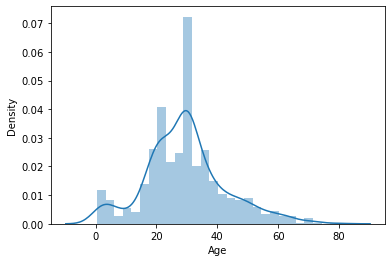

In [54]:
sns.distplot(train_set['Age'])

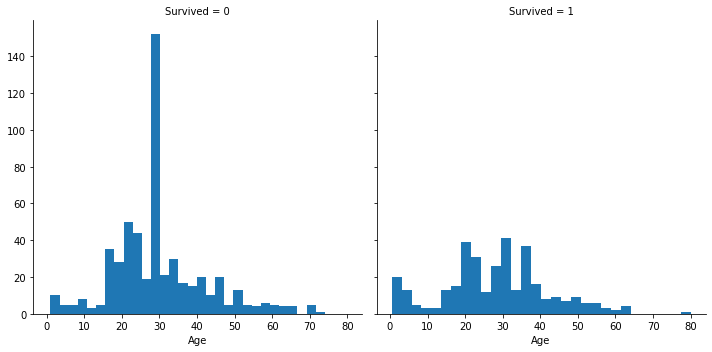

In [55]:
g = sns.FacetGrid(train_set, col='Survived',size=5)
g.map(plt.hist, 'Age', bins=30)

**Observations**

* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

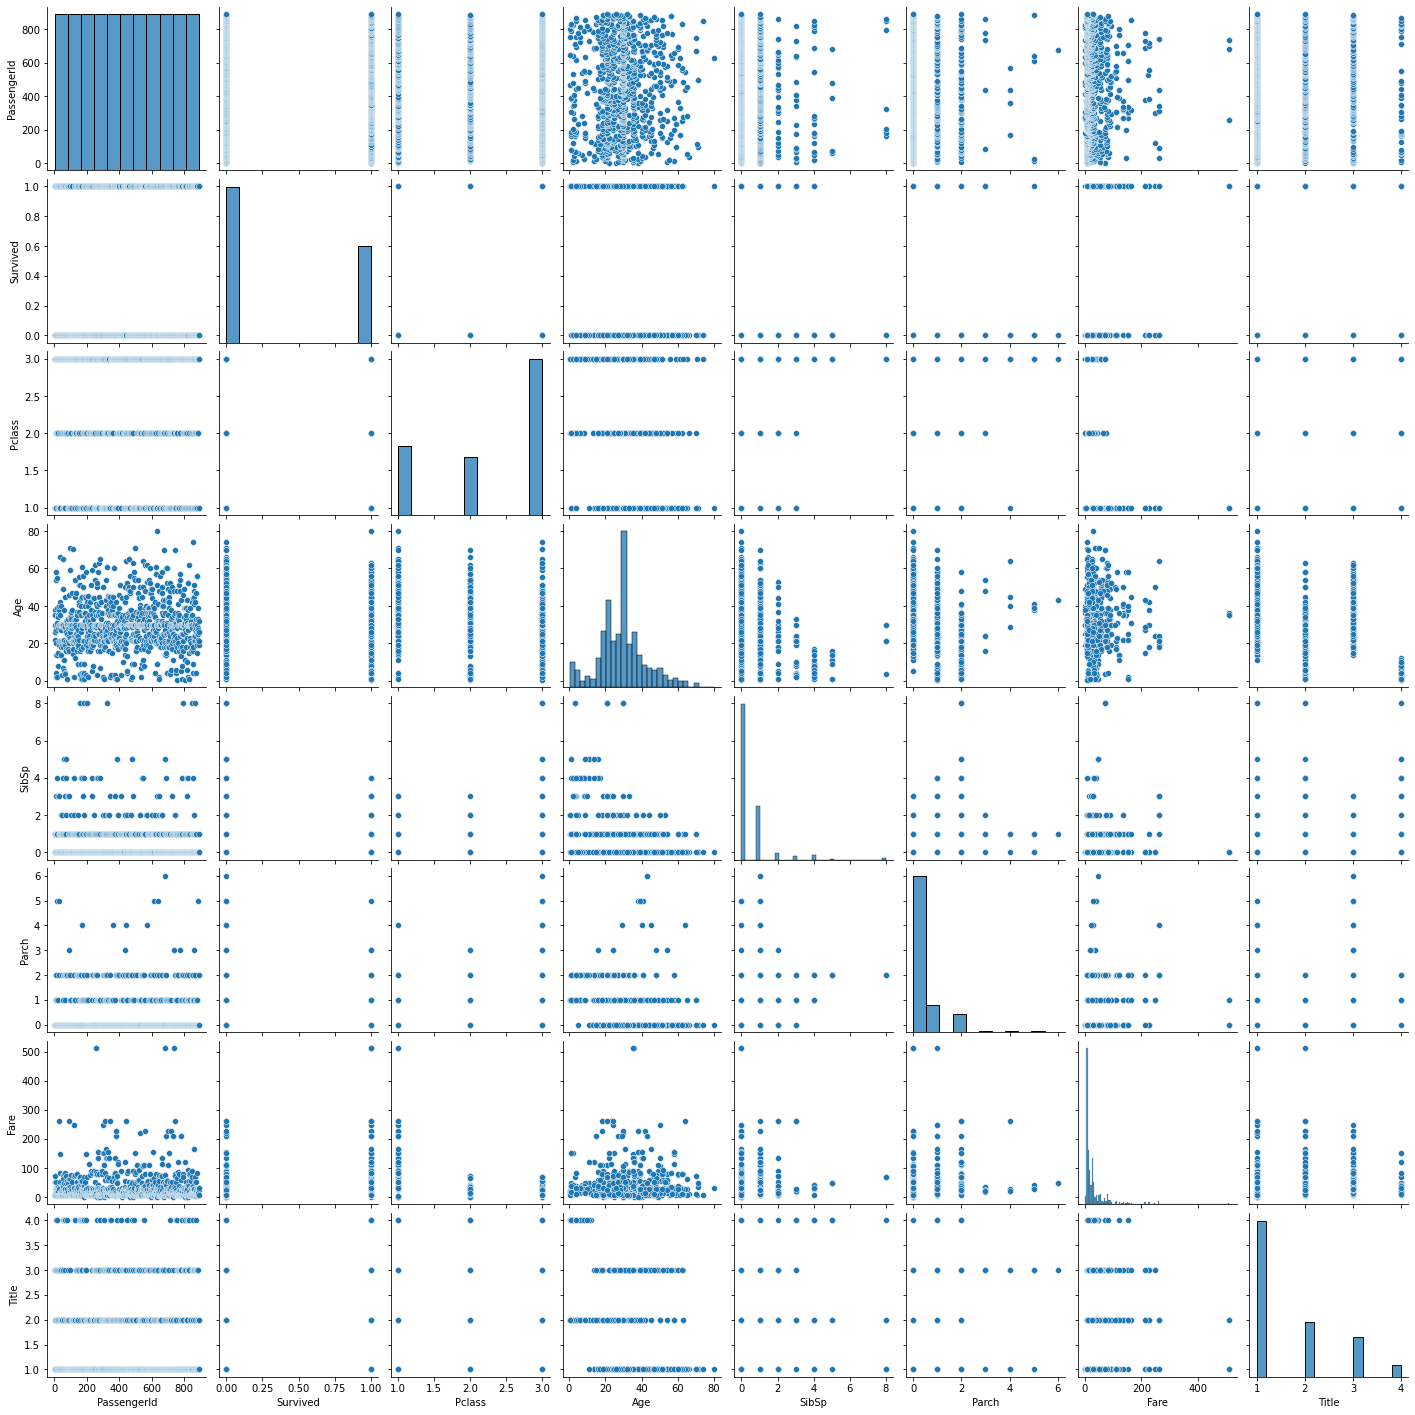

In [56]:
# pairplot
sns.pairplot(train_set)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

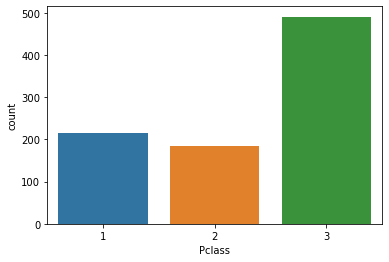

In [57]:
sns.countplot(x="Pclass", data=train_set)

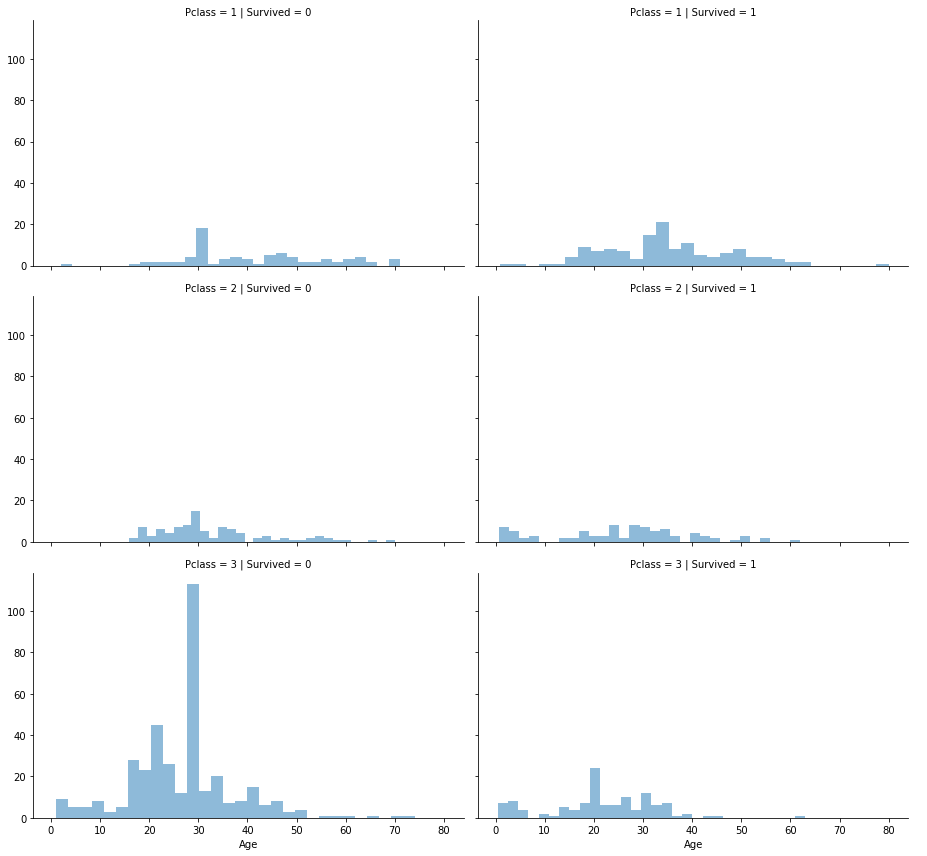

In [58]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_set, col='Survived', row='Pclass', size=4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=30)
grid.add_legend();

**Observations**

* Pclass=3 had most passengers, however most did not survive.
* Infact passengers in Pclass=2 and Pclass=3 mostly survived.
* Most passengers in Pclass=1 survived.
* Pclass varies in terms of Age distribution of passengers.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

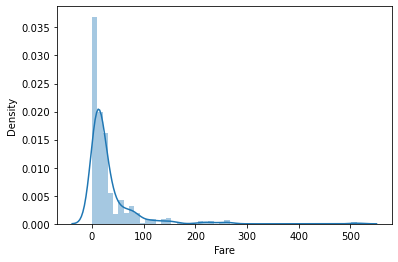

In [59]:
sns.distplot(train_set['Fare'])

<AxesSubplot:ylabel='Fare'>

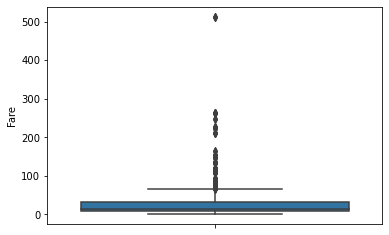

In [60]:
sns.boxplot(y=train_set['Fare'])

In [61]:
# Checking for Outlier
train_set.Fare.describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64

We can see in Fair column we have Outlier, we will check on this using Scalling later

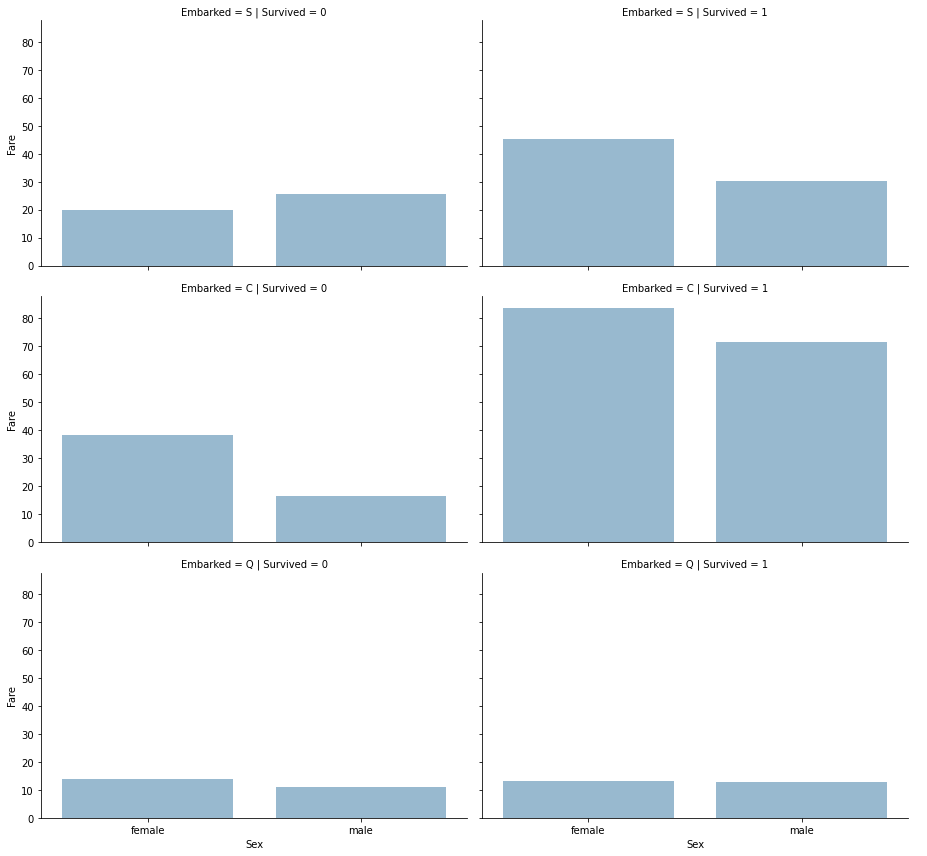

In [62]:
grid = sns.FacetGrid(train_set, row='Embarked', col='Survived', size=4, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Observations**

* Higher fare paying passengers had better survival.
* Port of embarkation correlates with survival rates.

<AxesSubplot:xlabel='Survived', ylabel='count'>

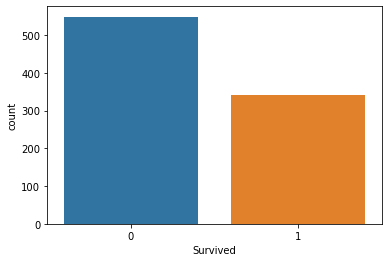

In [63]:
import seaborn as sns
sns.countplot(x="Survived", data=train_set)

In [64]:
### Checking the Survival Rate Rate
survival = (sum(train_set['Survived'])/len(train_set['Survived'].index))*100
survival

38.38383838383838

##### 38% of the total have survived which  is good amout of no in target variable.So there is no class imbalance

We can Removed Passanger Id and name as they will not of any use in this case

In [65]:
# Remove name and Passenger Id Column
train_set.drop(['Name'],axis=1,inplace=True)
test_set.drop(['Name'],axis=1,inplace=True)

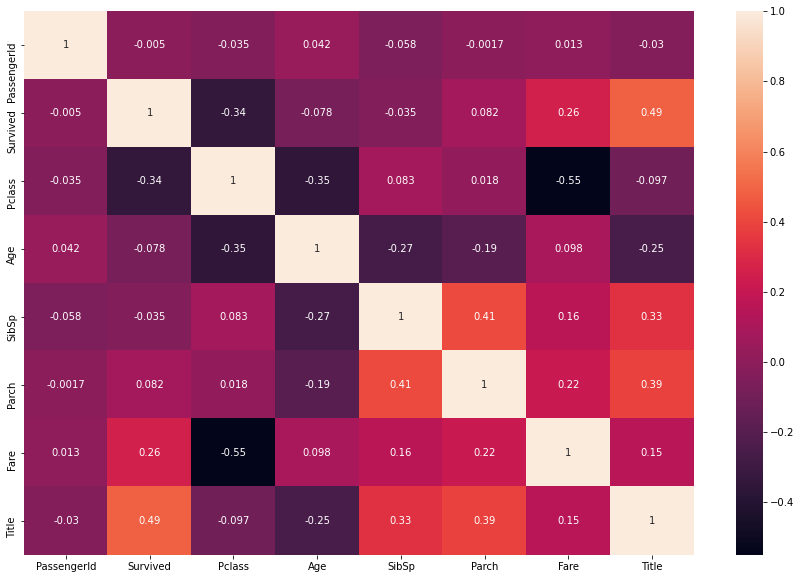

In [66]:
#Checking the Correlation Matrix
plt.figure(figsize = (15,10))
sns.heatmap(train_set.corr(),annot = True)
plt.show()

There is mostly negative correlation between Pclass, Age, Fare rest there is no big Correlation

###### Now lets check the relationship between targert variable and other dependent variable

##### Inferential Stats

In [67]:
#Check the Survival rate by Paasaenger Class
# print(train_set [['Pclass','Survived']].groupby('Pclass').mean())
a = train_set.groupby(['Pclass','Survived']).agg({'Pclass': 'sum'})
a.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Pclass
Pclass Survived           
1      0         37.037037
       1         62.962963
2      0         52.717391
       1         47.282609
3      0         75.763747
       1         24.236253

Highest Survival in Class 1 and lowest in Class 3

<AxesSubplot:xlabel='Pclass', ylabel='count'>

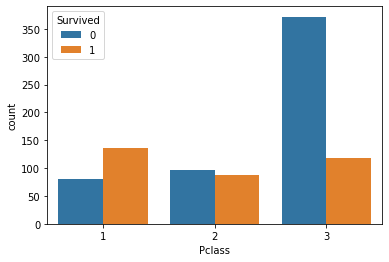

In [68]:
sns.countplot(x="Pclass", hue="Survived", data=train_set)

Class 3 Passenger are poorly affected with the sink

In [69]:
sep="---------------------------------------------------------------"
a = train_set.groupby(['Pclass','Sex','Survived']).agg({'Pclass': 'sum'})
a.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# print(round(a,2),'\n')

Pclass
Pclass Sex    Survived           
1      female 0          1.388889
              1         42.129630
       male   0         35.648148
              1         20.833333
2      female 0          3.260870
              1         38.043478
       male   0         49.456522
              1          9.239130
3      female 0         14.663951
              1         14.663951
       male   0         61.099796
              1          9.572301

In [70]:
#Check the Survival rate by Paasaenger Class
sep="---------------------------------------------------------------"
print( round(train_set [['Sex','Survived']].groupby(['Sex']).mean()*100,1),'\n',sep)
print(train_set [['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).agg(['count','mean']))

        Survived
Sex             
female      74.2
male        18.9 
 ---------------------------------------------------------------
              Survived          
                 count      mean
Pclass Sex                      
1      female       94  0.968085
       male        122  0.368852
2      female       76  0.921053
       male        108  0.157407
3      female      144  0.500000
       male        347  0.135447


In all the clases the survival rate for Female is higher during the evacuation time Female Passenger were the first to be evcuated we can infer from the above.

96% and 92% females were able to survive on the 1st and 2nd class respectively.

The Survival rate of Male is very less and as 1st is premium class near to the evacuation area o have seen max# of survival in male category. rest keep deminishing

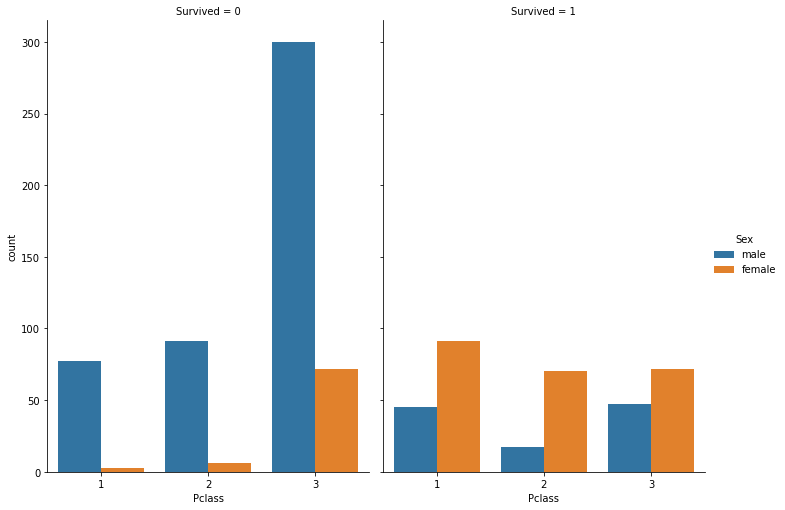

In [71]:
#tracking the Survival on the basis of Sex and PClass
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=train_set, kind="count",
                height=4, aspect=.7, size = 7);

In [72]:
# check the impact of Embarked Colum on Survival
print( round(train_set [['Embarked','Survived']].groupby(['Embarked']).mean()*100,1))

          Survived
Embarked          
C             55.4
Q             39.0
S             33.9


In [73]:
pd.crosstab(train_set['Survived'],train_set['Pclass']).apply(lambda r: (r/r.sum())*100, axis=1)

Pclass,1,2,3
Survived,,,
0,14.571949,17.668488,67.759563
1,39.766082,25.438596,34.795322


In [74]:
pd.crosstab(train_set['Survived'],[train_set['Pclass'],train_set['Sex']]).apply(lambda r: (r/r.sum())*100, axis=1)

Pclass            1                     2                     3           
Sex          female       male     female       male     female       male
Survived                                                                  
0          0.546448  14.025501   1.092896  16.575592  13.114754  54.644809
1         26.608187  13.157895  20.467836   4.970760  21.052632  13.742690

* From the above we can see female has highest survival rate.
* survival rate is also depends on passanger class.

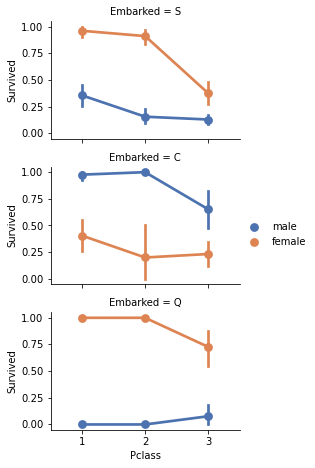

In [75]:
grid = sns.FacetGrid(train_set, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations**

* Female passengers had much better survival rate than males.
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

In [76]:
pd.crosstab(train_set['Survived'],[train_set['Embarked'],train_set['Sex']]).apply(lambda r: (r/r.sum())*100, axis=1)

Embarked          C                    Q                    S           
Sex          female       male    female      male     female       male
Survived                                                                
0          1.639344  12.021858  1.639344  6.921676  11.475410  66.302368
1         18.713450   8.479532  7.894737  0.877193  41.520468  22.514620

In [77]:
train_set.loc[(train_set['Parch']==0)&(train_set['SibSp']==0)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,GNR
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,GNR
5,6,0,3,male,30.0,0,0,330877,8.4583,Q,1,GNR
6,7,0,1,male,54.0,0,0,17463,51.8625,S,1,E
11,12,1,1,female,58.0,0,0,113783,26.5500,S,2,C
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,S,1,GNR
886,887,0,2,male,27.0,0,0,211536,13.0000,S,1,GNR
887,888,1,1,female,19.0,0,0,112053,30.0000,S,2,B
889,890,1,1,male,26.0,0,0,111369,30.0000,C,1,C


<AxesSubplot:xlabel='Parch', ylabel='count'>

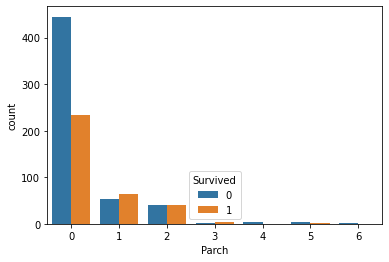

In [78]:
sns.countplot(x="Parch", hue="Survived", data=train_set)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

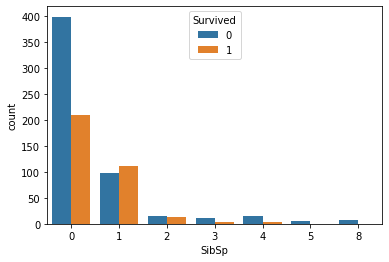

In [79]:
sns.countplot(x="SibSp", hue="Survived", data=train_set)

We can create a new feature for FamilySize which combines Parch and SibSp.

In [80]:
train_set['Family']=train_set['SibSp']+train_set['Parch']+1
test_set['Family']=test_set['SibSp']+test_set['Parch']+1
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,GNR,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,3,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,GNR,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,3,C,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,GNR,1


In [81]:
train_set[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [82]:
train_set['IsAlone'] = 0
test_set['IsAlone'] = 0
train_set.loc[train_set['Family'] == 1, 'IsAlone'] = 1
test_set.loc[test_set['Family'] == 1, 'IsAlone'] = 1
train_set[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [83]:
df = train_set.groupby(['Ticket']).size().reset_index(name='count')
print(df)

          Ticket  count
0         110152      3
1         110413      3
2         110465      2
3         110564      1
4         110813      1
..           ...    ...
676   W./C. 6608      4
677   W./C. 6609      1
678  W.E.P. 5734      1
679    W/C 14208      1
680    WE/P 5735      2

[681 rows x 2 columns]


As we can see and multiple people have the same ticket No surprise here as people are travelling with Sibing and Parent. Lets create one more varibale for Ticket Head Count and then we can divide the Total fare per Person

But before the Ticket head Count we need to take test data file for calculating actual no, like how many total passanger were travelling on the same ticket. Then only Fair per person will be the right amount. So for this only combine the test and train data

In [84]:
# New column for Ticket Head Count on teh complete data
# master=pd.concat([train_set, test_set])
# master.head()
# train_set['TicketHeadCount']=train_set['Ticket'].map(master['Ticket'].value_counts())
train_set['TicketHeadCount']=train_set['Ticket'].map(train_set['Ticket'].value_counts())
test_set['TicketHeadCount']=test_set['Ticket'].map(test_set['Ticket'].value_counts())
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family,IsAlone,TicketHeadCount
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,GNR,2,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,3,C,2,0,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,GNR,1,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,3,C,2,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,GNR,1,1,1


In [85]:
#Let take fair per Person as per Ticket head Count
train_set['FairPerPerson']=train_set['Fare']/train_set['TicketHeadCount']
test_set['FairPerPerson']=test_set['Fare']/test_set['TicketHeadCount']
train_set[['FairPerPerson']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,FairPerPerson
count,891.000000
mean,17.788989
std,21.218157
min,0.000000
25%,7.762500
50%,8.850000
75%,24.288200
90%,39.400000
95%,53.156250
99%,87.218510


There is certainely outlier in Fair and same thing we can see in Fair Per Person

In [86]:
train_set['FairPerPerson'].value_counts()<1

13.0000    False
8.0500     False
7.7500     False
7.8958     False
10.5000    False
           ...  
9.8375     False
59.4000    False
83.1583    False
12.2750    False
12.2875    False
Name: FairPerPerson, Length: 248, dtype: bool

<AxesSubplot:xlabel='FairPerPerson', ylabel='Density'>

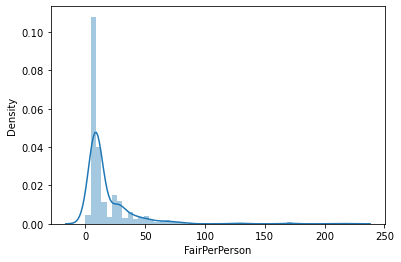

In [87]:
# Lets check the distribution
sns.distplot(train_set['FairPerPerson'])

Max no of people have per per ticket cost between 0-$50.0 . As min Fair is zero that is not possible either there is a mistake or it can be the staff those will also be boarded for passanger service. We will check in sometime for this

###### Lets Check on Family Size now

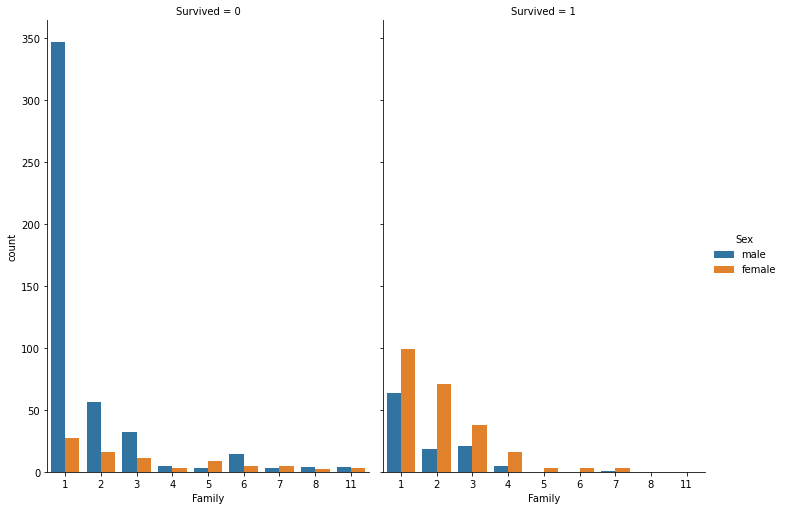

In [88]:
#tracking th Survival on the basis of Family Size and Sex
g = sns.catplot(x="Family", hue="Sex", col="Survived",
                data=train_set, kind="count",
                height=7, aspect=.7);


1. From the graph the Single Member or solo passanger survival rate is very poor.
2. Male Solo Passanger number is quite high and mortality rate too in comparision too Female.
3. Survival Chances become low after family size>4

Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

<AxesSubplot:xlabel='Pclass', ylabel='FairPerPerson'>

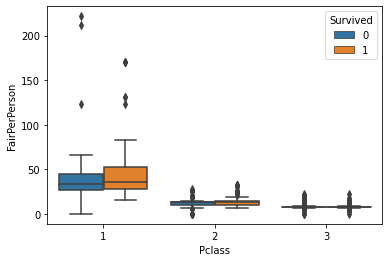

In [89]:
sns.boxplot(x = 'Pclass', y = 'FairPerPerson',hue='Survived', data = train_set)

On Fare Per Person among Survival and non survivers are same . Only 1st class have some outliers

In [90]:
# Group the Deck by Class
#print(train_set.groupby([ 'Pclass','Deck'])['Survived'].agg(['count','mean']))

In [91]:
# Lets Check the pattern of Deck on Age
#sns.swarmplot(x="Deck",y="Age",hue='Sex',data=train_set,palette="Set1", split=True)

The Deck are randomly distributed over. GNR which we named as unknown have highest distribution.

2 reasons->Either Deck no on others are missing or Deck space were small rooms

In [92]:
#sns.swarmplot(x="Deck",y="FairPerPerson",hue='Pclass',data=train_set,palette="Set1", split=True)

Even over the class the Deck are present for each. So nothing surprises here.

<Figure size 1800x1008 with 0 Axes>

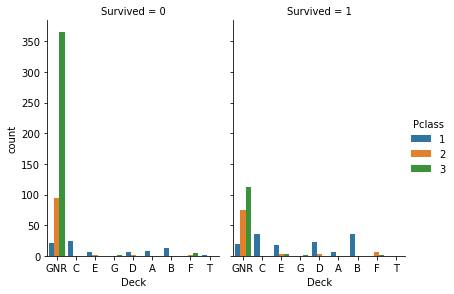

In [93]:
plt.figure(figsize=(25, 14))
sns.catplot(x="Deck", col="Survived",data=train_set, kind="count",height=4, aspect=.7, hue='Pclass')
plt.show()

cabin column is not providing any insights majority GNR class has less survival rate which we imputed.

In [94]:
print(train_set.loc[(train_set['FairPerPerson']==0),['Embarked','Ticket','SibSp','Parch','Age','Sex','Family','TicketHeadCount']])

    Embarked  Ticket  SibSp  Parch   Age   Sex  Family  TicketHeadCount
179        S    LINE      0      0  36.0  male       1                4
263        S  112059      0      0  40.0  male       1                1
271        S    LINE      0      0  25.0  male       1                4
277        S  239853      0      0  30.0  male       1                3
302        S    LINE      0      0  19.0  male       1                4
413        S  239853      0      0  30.0  male       1                3
466        S  239853      0      0  30.0  male       1                3
481        S  239854      0      0  30.0  male       1                1
597        S    LINE      0      0  49.0  male       1                4
633        S  112052      0      0  30.0  male       1                1
674        S  239856      0      0  30.0  male       1                1
732        S  239855      0      0  30.0  male       1                1
806        S  112050      0      0  39.0  male       1          

1. From this above data it looks like these are Line man and Crew member. 
2. All have the same boarding station and Ticket no on some says"Line". 
3. All are male and of approx average age group 25-45 years.
4. These are solo  travellers no sibiling or parent

In [95]:
train_set['FairPerPerson'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    891.000000
mean      17.788989
std       21.218157
min        0.000000
25%        7.762500
50%        8.850000
75%       24.288200
90%       39.400000
95%       53.156250
99%       87.218510
max      221.779200
Name: FairPerPerson, dtype: float64

In [96]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    object 
 4   Age              891 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Embarked         891 non-null    object 
 10  Title            891 non-null    int64  
 11  Deck             891 non-null    object 
 12  Family           891 non-null    int64  
 13  IsAlone          891 non-null    int64  
 14  TicketHeadCount  891 non-null    int64  
 15  FairPerPerson    891 non-null    float64
dtypes: float64(3), int64(9), object(4)
memory usage: 111.5+ KB


In [97]:
quantile_1, quantile_3 = np.percentile(train_set.FairPerPerson, [25, 75])

In [98]:
print(quantile_1, quantile_3)

7.7625 24.288200000000003


In [99]:
iqr_value = quantile_3 - quantile_1
iqr_value

16.525700000000004

In [100]:
lower_bound_val = quantile_1 - (1.5 * iqr_value)
upper_bound_val = quantile_3 + (1.5 * iqr_value)
print(lower_bound_val, upper_bound_val)

-17.02605000000001 49.07675000000001


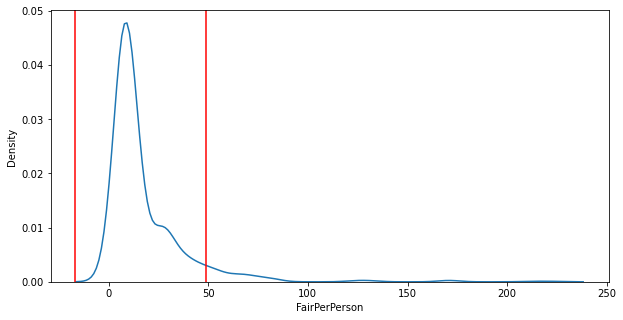

In [101]:
plt.figure(figsize = (10, 5))
sns.kdeplot(train_set.FairPerPerson)
plt.axvline(x=lower_bound_val, color = 'red')
plt.axvline(x=upper_bound_val, color = 'red')

In [102]:
train_set[(train_set.FairPerPerson >= lower_bound_val) & (train_set.FairPerPerson <= upper_bound_val)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      832 non-null    int64  
 1   Survived         832 non-null    int64  
 2   Pclass           832 non-null    int64  
 3   Sex              832 non-null    object 
 4   Age              832 non-null    float64
 5   SibSp            832 non-null    int64  
 6   Parch            832 non-null    int64  
 7   Ticket           832 non-null    object 
 8   Fare             832 non-null    float64
 9   Embarked         832 non-null    object 
 10  Title            832 non-null    int64  
 11  Deck             832 non-null    object 
 12  Family           832 non-null    int64  
 13  IsAlone          832 non-null    int64  
 14  TicketHeadCount  832 non-null    int64  
 15  FairPerPerson    832 non-null    float64
dtypes: float64(3), int64(9), object(4)
memory usage: 110.5+ KB


In [103]:
round(100*(train_set[(train_set.FairPerPerson >= lower_bound_val) & (train_set.FairPerPerson <= upper_bound_val)].count()/len(train_set.index)), 2)

PassengerId        93.38
Survived           93.38
Pclass             93.38
Sex                93.38
Age                93.38
SibSp              93.38
Parch              93.38
Ticket             93.38
Fare               93.38
Embarked           93.38
Title              93.38
Deck               93.38
Family             93.38
IsAlone            93.38
TicketHeadCount    93.38
FairPerPerson      93.38
dtype: float64

In [104]:
round(100*(train_set[(train_set.FairPerPerson >= 0) & (train_set.FairPerPerson <= 100)].count()/len(train_set.index)), 2)

PassengerId        98.99
Survived           98.99
Pclass             98.99
Sex                98.99
Age                98.99
SibSp              98.99
Parch              98.99
Ticket             98.99
Fare               98.99
Embarked           98.99
Title              98.99
Deck               98.99
Family             98.99
IsAlone            98.99
TicketHeadCount    98.99
FairPerPerson      98.99
dtype: float64

We will choose some Fare range which we set max to leave out after that.
1. People with Fare 0  we will exclude them.
2. People with fair greater than 60 we will exclude them

By doing this we will only loose approve 1% of data and that is on which we can still live with it.

In [105]:
train_set_copy=train_set.loc[(train_set.FairPerPerson>0) & (train_set.FairPerPerson<=100)]
train_set_copy.shape

(867, 16)

In [106]:
train_set_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      867 non-null    int64  
 1   Survived         867 non-null    int64  
 2   Pclass           867 non-null    int64  
 3   Sex              867 non-null    object 
 4   Age              867 non-null    float64
 5   SibSp            867 non-null    int64  
 6   Parch            867 non-null    int64  
 7   Ticket           867 non-null    object 
 8   Fare             867 non-null    float64
 9   Embarked         867 non-null    object 
 10  Title            867 non-null    int64  
 11  Deck             867 non-null    object 
 12  Family           867 non-null    int64  
 13  IsAlone          867 non-null    int64  
 14  TicketHeadCount  867 non-null    int64  
 15  FairPerPerson    867 non-null    float64
dtypes: float64(3), int64(9), object(4)
memory usage: 115.1+ KB


<AxesSubplot:xlabel='Pclass', ylabel='FairPerPerson'>

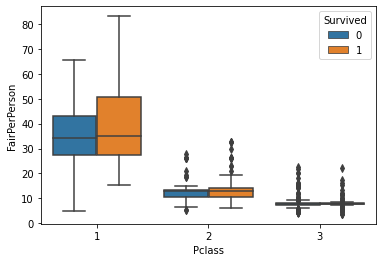

In [107]:
sns.boxplot(x = 'Pclass', y = 'FairPerPerson',hue='Survived', data = train_set_copy)

#### EDA Discovery
1. Female Gender is highly survived on the ship regardless of any class against male.
2. People with 1st Class have low casulity rate.
3. Pclass and Fair are co-linear and will explain the same impact on Targer variable. As Fair increase, class increase and with that your survival chances do increase.
4. Travelling in a group of 2-4 will increase your chances of getting saved.
5. Senior Citizen on lower class will not be able to make it out from the casulity.
6. 25-40 age group will have more chances to get saved.

##### Dropping some columns which we will impact on Survival.
1. Title is used for imputing Age missing values and things can be drawn out of Age column.
2. Will drop Parch, Sibsp as we derived Family and IsAlone column.
3. Will drop Ticket, Deck, Ticket Head Count Column as it won't give any impact.
4. Will drop Fare columns as we derived FairPerPerson column to use

In [108]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family,IsAlone,TicketHeadCount,FairPerPerson
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,GNR,2,0,1,7.2500
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,3,C,2,0,1,71.2833
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,GNR,1,1,1,7.9250
3,4,1,1,female,35.0,1,0,113803,53.1000,S,3,C,2,0,2,26.5500
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,GNR,1,1,1,8.0500


In [109]:
test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family,IsAlone,TicketHeadCount,FairPerPerson
0,892,3,male,34.5,0,0,330911,7.8292,Q,1,1,1,1,7.8292
1,893,3,female,47.0,1,0,363272,7.0000,S,3,2,0,1,7.0000
2,894,2,male,62.0,0,0,240276,9.6875,Q,1,1,1,1,9.6875
3,895,3,male,27.0,0,0,315154,8.6625,S,1,1,1,1,8.6625
4,896,3,female,22.0,1,1,3101298,12.2875,S,3,3,0,1,12.2875


In [110]:
train_set_copy.drop(['Parch','Ticket','Fare','Deck','SibSp','TicketHeadCount'],axis=1,inplace=True)
test_set.drop(['Parch','Ticket','Fare','SibSp','TicketHeadCount'],axis=1,inplace=True)
train_set_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,Family,IsAlone,FairPerPerson
0,1,0,3,male,22.0,S,1,2,0,7.2500
1,2,1,1,female,38.0,C,3,2,0,71.2833
2,3,1,3,female,26.0,S,2,1,1,7.9250
3,4,1,1,female,35.0,S,3,2,0,26.5500
4,5,0,3,male,35.0,S,1,1,1,8.0500


##### For categorical variables with multiple levels, create dummy features (one-hot encoded)


In [111]:
train_set_copy = pd.concat([train_set_copy, pd.get_dummies(train_set_copy['Sex'], drop_first=True)], axis=1)
test_set = pd.concat([test_set, pd.get_dummies(test_set['Sex'], drop_first=True)], axis=1)

In [112]:
train_set_copy['Embarked'] = train_set_copy['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_set['Embarked'] = test_set['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [113]:
#Drop Original Columns
train_set_copy.drop(['Sex'],axis=1,inplace=True)
test_set.drop(['Sex'],axis=1,inplace=True)

##### Test-Train Split

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Feature Scaling

In [115]:
X_train = train_set_copy.drop("Survived", axis=1)
y_train = train_set_copy["Survived"]
X_test  = test_set.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((867, 9), (867,), (418, 8))

In [116]:
scaler = StandardScaler()

X_train[['Age','FairPerPerson']] = scaler.fit_transform(X_train[['Age','FairPerPerson']])
X_test[['Age','FairPerPerson']] = scaler.fit_transform(X_test[['Age','FairPerPerson']])

X_train.head()

,PassengerId,Pclass,Age,Embarked,Title,Family,IsAlone,FairPerPerson,male
0,1,3,-0.547293,0,1,2,0,-0.620156,1
1,2,1,0.650347,1,3,2,0,3.625772,0
2,3,3,-0.247883,0,2,1,1,-0.575398,0
3,4,1,0.425790,0,3,2,0,0.659591,0
4,5,3,0.425790,0,1,1,1,-0.567109,1


In [117]:
### Checking the Survival Rate
Survival = (sum(train_set_copy['Survived'])/len(train_set_copy['Survived'].index))*100
Survival

38.63898500576701

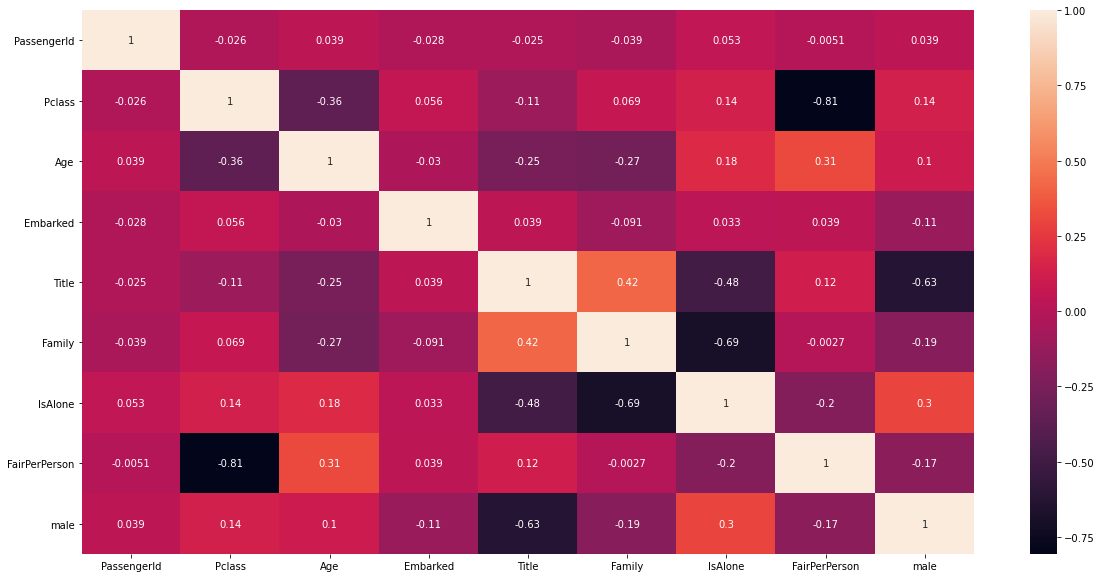

In [118]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model Building

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,accuracy_score

###### Defualt Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [120]:
col = [ 'Pclass', 'Age', 'Embarked', 'Title', 'Family',
       'IsAlone', 'FairPerPerson', 'male']

In [121]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train[col], y_train)
Y_pred = logreg.predict(X_test[col])
acc_log = round(logreg.score(X_train[col], y_train) * 100, 2)
acc_log

82.81

In [122]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train[col], y_train)
Y_pred = svc.predict(X_test[col])
acc_svc = round(svc.score(X_train[col], y_train) * 100, 2)
acc_svc

83.04

In [123]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train[col], y_train)
Y_pred = knn.predict(X_test[col])
acc_knn = round(knn.score(X_train[col], y_train) * 100, 2)
acc_knn

87.54

In [124]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train[col], y_train)
Y_pred = decision_tree.predict(X_test[col])
acc_decision_tree = round(decision_tree.score(X_train[col], y_train) * 100, 2)
acc_decision_tree

97.81

In [125]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train[col], y_train)
Y_pred = random_forest.predict(X_test[col])
random_forest.score(X_train[col], y_train)
acc_random_forest = round(random_forest.score(X_train[col], y_train) * 100, 2)
acc_random_forest

97.81

In [126]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,97.81
4,Decision Tree,97.81
1,KNN,87.54
0,Support Vector Machines,83.04
2,Logistic Regression,82.81


From the Above represtation we can clearly see the Random forest and Decision Model Performace is better among all.

In [127]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train[col], y_train)
Y_pred = random_forest.predict(X_test[col])
random_forest.score(X_train[col], y_train)
acc_random_forest = round(random_forest.score(X_train[col], y_train) * 100, 2)
acc_random_forest

97.81